# Linear Algebra Essentials for Geophysical Inverse Theory

## Key Concepts

### 1. Matrices and Vectors
- **Forward operator (G)**: Maps model parameters to predicted data
  $$ \mathbf{d} = \mathbf{G}\mathbf{m} $$
- **Model vector (m)**: Contains unknown parameters we seek
- **Data vector (d)**: Contains measurements
- **System dimensions**: G is m × n matrix
  - m = number of data points
  - n = number of model parameters

### 2. Important Matrix Properties
- **Rank**: Number of linearly independent rows/columns
- **Condition number**: $\kappa = \sigma_{\text{max}}/\sigma_{\text{min}}$
  - Measures sensitivity to perturbations
  - Large κ indicates ill-conditioning
- **Determinant**: Measures volume transformation
- **Trace**: Sum of diagonal elements

### 3. Essential Decompositions
#### Singular Value Decomposition (SVD)
$$ \mathbf{G} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T $$
- U: Left singular vectors (data space)
- V: Right singular vectors (model space)
- Σ: Diagonal matrix of singular values
- Key for understanding resolution and uncertainty

#### Eigenvalue Decomposition
$$ \mathbf{G} = \mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^T \text{ (for symmetric matrices)} $$
- Important for covariance matrices
- Basis for Principal Component Analysis

### 4. Key Subspaces
- **Null space**: $\{\mathbf{m} | \mathbf{G}\mathbf{m} = \mathbf{0}\}$
  - Non-uniqueness source
  - Critical in underdetermined problems
- **Range space**: Possible data vectors
- **Row space**: Model combinations
- **Column space**: Achievable predictions

### 5. Solution Methods
#### Overdetermined Systems (m > n)
$$ \mathbf{m} = (\mathbf{G}^T \mathbf{G})^{-1} \mathbf{G}^T \mathbf{d} \text{ (Least squares)} $$

#### Underdetermined Systems (n > m)
$$ \mathbf{m} = \mathbf{G}^T (\mathbf{G}\mathbf{G}^T)^{-1} \mathbf{d} \text{ (Minimum norm)} $$

#### Regularized Solutions
$$ \mathbf{m} = (\mathbf{G}^T \mathbf{G} + \lambda\mathbf{I})^{-1} \mathbf{G}^T \mathbf{d} \text{ (Tikhonov)} $$

### 6. Resolution and Uncertainty
- **Model Resolution**: $\mathbf{R} = \mathbf{G}^{-1}\mathbf{G}$
- **Data Resolution**: $\mathbf{N} = \mathbf{G}\mathbf{G}^{-1}$
- **Posterior Covariance**: $\mathbf{C}_m = \sigma^2(\mathbf{G}^T \mathbf{G})^{-1}$

### 7. Common Problem Types
1. **Overdetermined**
   - More data than unknowns
   - Least squares solution
   - Focus on data fit

2. **Underdetermined**
   - More unknowns than data
   - Non-unique solutions
   - Need regularization

3. **Mixed-determined**
   - Common in practice
   - Some parameters well-constrained
   - Others poorly determined

### 8. Regularization Approaches
1. **Tikhonov (Ridge)**
   $$ \text{minimize } \|\mathbf{G}\mathbf{m} - \mathbf{d}\|^2 + \lambda\|\mathbf{m}\|^2 $$

2. **Truncated SVD**
   - Filter small singular values
   - Stabilize solution

3. **Weighted Regularization**
   $$ \text{minimize } \|\mathbf{G}\mathbf{m} - \mathbf{d}\|^2_{\mathbf{C}_d^{-1}} + \|\mathbf{m}\|^2_{\mathbf{C}_m^{-1}} $$

# Projectile Motion Least Squares Example

## Physical Model
The height y of a projectile at time t is given by:
$$ y(t) = h_0 + v_0t - \frac{1}{2}gt^2 $$
where:
- $h_0$: initial height
- $v_0$: initial velocity
- $g$: acceleration due to gravity ($\approx 9.81$ m/s²)

## Linear Least Squares Formulation

### 1. Design Matrix (G)
$$ G = \begin{bmatrix} 
1 & t_1 \\
1 & t_2 \\
1 & t_3 \\
\vdots & \vdots \\
1 & t_n
\end{bmatrix} $$

### 2. Model Parameters (m)
$$ \mathbf{m} = \begin{bmatrix} h_0 \\ v_0 \end{bmatrix} $$

### 3. Data Vector (d)
$$ \mathbf{d} = \mathbf{y} + \frac{1}{2}g\mathbf{t}^2 $$

## Solution Method
The normal equations:
$$ (G^T G)\mathbf{m} = G^T \mathbf{d} $$

give the least squares solution:
$$ \mathbf{m} = (G^T G)^{-1} G^T \mathbf{d} $$

True parameters: h₀=10.00 m, v₀=15.00 m/s
Fitted parameters: h₀=10.39 m, v₀=14.53 m/s


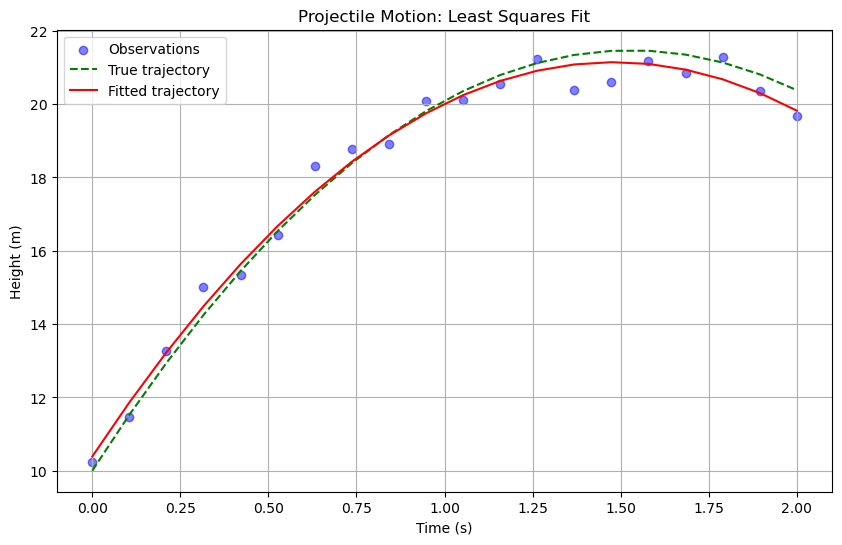

RMS error: 0.369 m


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fit_projectile(t, y, g=9.81):
    """
    Fit projectile motion data
    t: time points
    y: height measurements
    g: acceleration due to gravity
    Returns: [h₀, v₀], fitted initial height and velocity
    """
    # Design matrix
    G = np.column_stack([np.ones_like(t), t])
    
    # Adjusted data vector
    d_adj = y + 0.5*g*t**2
    
    # Solve normal equations
    m = np.linalg.inv(G.T @ G) @ G.T @ d_adj
    
    return m

# Generate synthetic data
np.random.seed(42)
t = np.linspace(0, 2, 20)  # 20 time points from 0 to 2 seconds
true_h0 = 10.0  # Initial height (meters)
true_v0 = 15.0  # Initial velocity (m/s)
g = 9.81        # Gravity (m/s²)

# True trajectory
y_true = true_h0 + true_v0*t - 0.5*g*t**2

# Add noise to create synthetic measurements
noise = np.random.normal(0, 0.5, len(t))
y_obs = y_true + noise

# Fit the data
fitted_params = fit_projectile(t, y_obs)
fitted_h0, fitted_v0 = fitted_params

# Calculate fitted trajectory
y_fit = fitted_h0 + fitted_v0*t - 0.5*g*t**2

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(t, y_obs, color='blue', label='Observations', alpha=0.5)
plt.plot(t, y_true, 'g--', label='True trajectory')
plt.plot(t, y_fit, 'r-', label='Fitted trajectory')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion: Least Squares Fit')
plt.grid(True)
plt.legend()

# Print results
print(f"True parameters: h₀={true_h0:.2f} m, v₀={true_v0:.2f} m/s")
print(f"Fitted parameters: h₀={fitted_h0:.2f} m, v₀={fitted_v0:.2f} m/s")

plt.show()

# Calculate goodness of fit
residuals = y_obs - y_fit
rms_error = np.sqrt(np.mean(residuals**2))
print(f"RMS error: {rms_error:.3f} m")

# Linear Dependence of Matrix Columns

## Definition
A set of vectors (columns) is linearly dependent if one vector can be expressed as a linear combination of the others:

$$ \mathbf{a}_j = \sum_{i \neq j} c_i \mathbf{a}_i $$

where $c_i$ are scalar coefficients.

## Matrix Perspective
For a matrix $\mathbf{G}$, its columns $[\mathbf{g}_1, \mathbf{g}_2, ..., \mathbf{g}_n]$ are linearly dependent if there exists a non-zero vector $\mathbf{x}$ such that:

$$ \mathbf{G}\mathbf{x} = \mathbf{0} $$

## Implications for Inverse Problems

### 1. Rank Deficiency
- If columns are linearly dependent, matrix is rank deficient
- $\text{rank}(\mathbf{G}) < n$ where n is number of columns

### 2. Non-unique Solutions
For the system $\mathbf{G}\mathbf{m} = \mathbf{d}$:
- If $\mathbf{m}_1$ is a solution
- And $\mathbf{G}\mathbf{x} = \mathbf{0}$
- Then $\mathbf{m}_2 = \mathbf{m}_1 + \mathbf{x}$ is also a solution

### 3. Null Space
- Linear dependence creates a non-trivial null space
- $\text{null}(\mathbf{G}) = \{\mathbf{x} | \mathbf{G}\mathbf{x} = \mathbf{0}\}$
- Dimension of null space = $n - \text{rank}(\mathbf{G})$

## Example
Consider the matrix:

$$ \mathbf{G} = \begin{bmatrix} 
1 & 2 & 4 \\
2 & 4 & 8 \\
3 & 6 & 12
\end{bmatrix} $$

The third column is linearly dependent:
$$ \mathbf{g}_3 = 2\mathbf{g}_1 = \mathbf{g}_2 $$

## Practical Significance
1. **Parameter Resolution**
   - Linear dependence means parameters cannot be resolved independently
   - Multiple parameter combinations give same data fit

2. **Solution Strategy**
   - Need regularization or additional constraints
   - Consider parameter transformations
   - May need to reduce number of model parameters